In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Any, Dict, List
from google import genai
from google.genai.errors import APIError
from dotenv import load_dotenv
import os
import importlib, figure_library
import warnings
warnings.filterwarnings("ignore")

In [2]:
# prepare data, use GA as example
df_raw = pd.read_csv(
    "wide_filled.csv"
)

df = df_raw.copy()
df["YEARWEEK"] = df["YEARWEEK"].astype(int)
df = df.sort_values("YEARWEEK")
s = df['YEARWEEK'].astype(str)

# Monday of each ISO year-week
df['week_start'] = pd.to_datetime(s + '1', format='%G%V%u')
train = df.iloc[260:468, 11].to_numpy()
test = df.iloc[468:520, 11].to_numpy()

df_half = df.copy()
df_half = df_half.iloc[len(df_half) // 2 :].reset_index(drop=True)

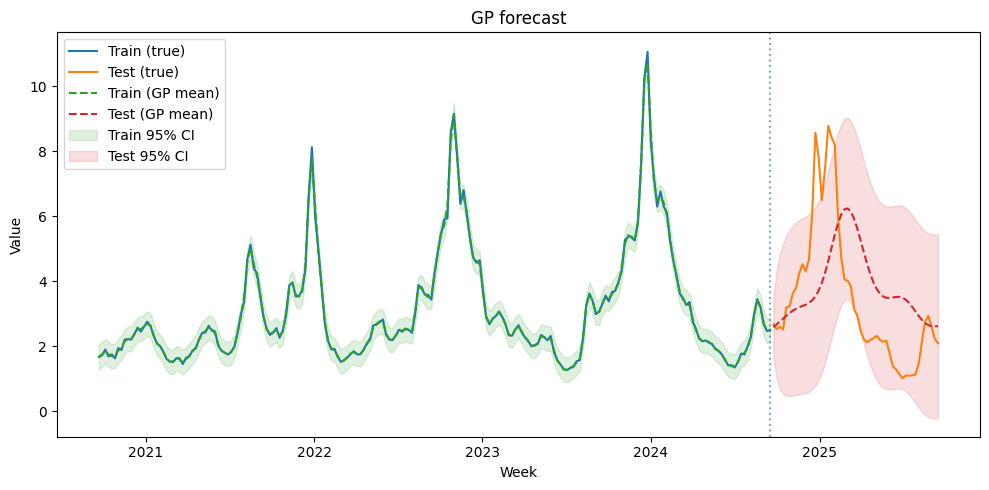

In [4]:
# GP forecast
from figure_library import gp_forecast_plot, gp_forecast_fit
res = gp_forecast_fit(
    train, test,
    period_steps=52,         # yearly seasonality in weeks
    use_trend=True,          # include linear trend
    normalize=True,
    random_state=0,
    n_restarts=5,
	alpha = 0
)

fig, ax = gp_forecast_plot(
    res,
    time_points=df_half["week_start"],
    xlabel="Week",
    ylabel="Value",
	title="GP forecast"
)

In [ ]:
load_dotenv() 
importlib.reload(figure_library)
# Verification of API
print(os.getenv("GEMINI_API_KEY"))

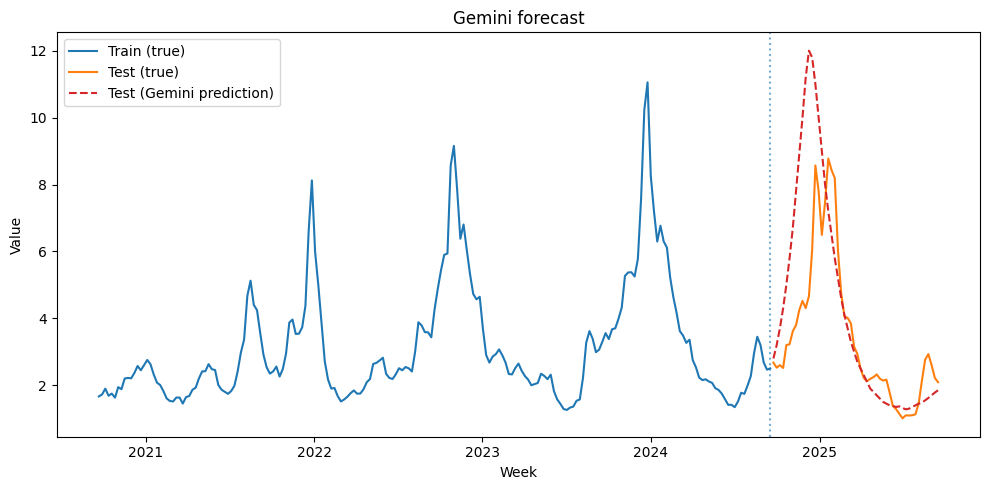

In [7]:
from figure_library import gemini_forecast, gemini_forecast_plot
res = gemini_forecast(train=train, test=test)
fig, ax = gemini_forecast_plot(
    res,
    time_points=df_half["week_start"],
    xlabel="Week",
    ylabel="Value",
	title="Gemini forecast"
)

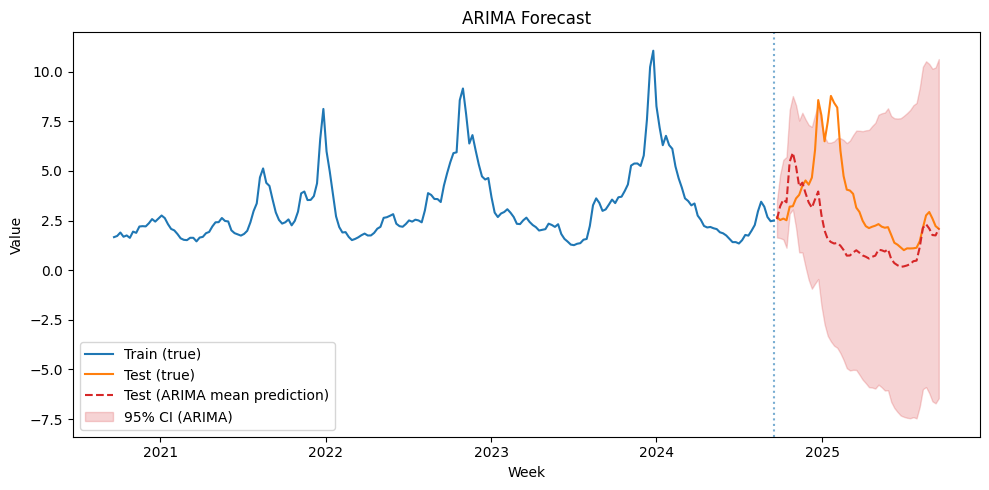

In [8]:
importlib.reload(figure_library)
from figure_library import arima_forecast
fig, ax = arima_forecast(
    train=train,
    test=test,
    time_points=df_half["week_start"],
    title="ARIMA Forecast",
    xlabel="Week",
    ylabel="Value",
)